In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the "./data/" directory.

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['german_credit_data.csv']


In [2]:
data = pd.read_csv("../input/german_credit_data.csv", index_col=0)

In [3]:
data.head(10) 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [4]:
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [7]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [8]:
data.shape 

(1000, 9)

In [9]:
data.columns 

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
print(data.nunique()) 


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [11]:
data.sample(5) 


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
509,45,male,3,own,moderate,NaN,8588,39,car
609,45,male,2,free,NaN,NaN,1300,15,car
819,26,male,2,own,little,little,1345,18,radio/TV
232,35,male,2,own,moderate,NaN,2141,12,radio/TV
182,40,male,1,own,NaN,little,1647,21,car


In [12]:
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})  
# Veri kümesinde ki eksik veri sayılarını ve oranlarını gösterir.

,Missing Records,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


In [13]:
data["Saving accounts"].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [14]:
data["Checking account"].value_counts(dropna = False) 

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [15]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True) 

In [16]:
data.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


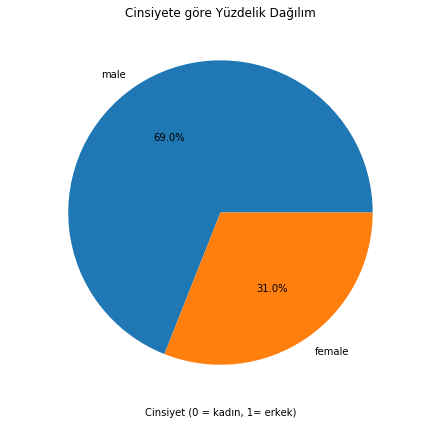

In [17]:
fig = plt.figure(figsize=(7,7))  
data['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel(" ", fontsize = 20)
plt.title("Cinsiyete göre Yüzdelik Dağılım")
print("")   

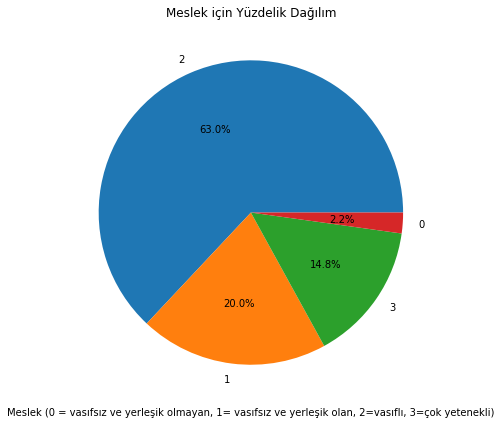

In [18]:
fig = plt.figure(figsize=(7,7))
data['Job'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Meslek (0 = vasıfsız ve yerleşik olmayan, 1= vasıfsız ve yerleşik olan, 2=vasıflı, 3=çok yetenekli)")
plt.ylabel(" ", fontsize = 20)
plt.title("Meslek için Yüzdelik Dağılım")
print("") 

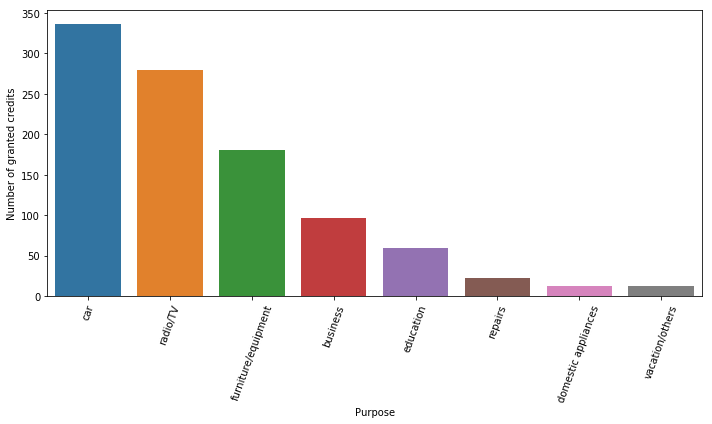

In [19]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.ylabel("Number of granted credits")
plt.tight_layout()

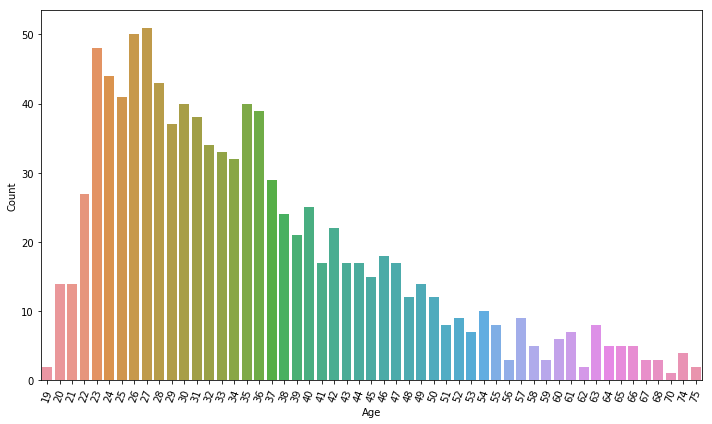

In [20]:
n_credits = data.groupby("Age")["Purpose"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Age",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.tight_layout()

In [21]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(15,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

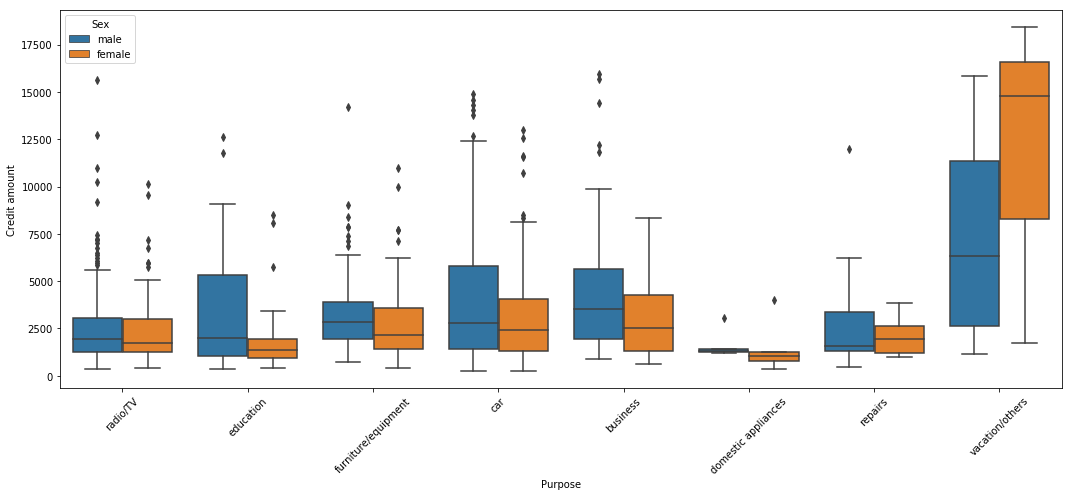

In [22]:
boxes("Purpose","Credit amount","Sex")

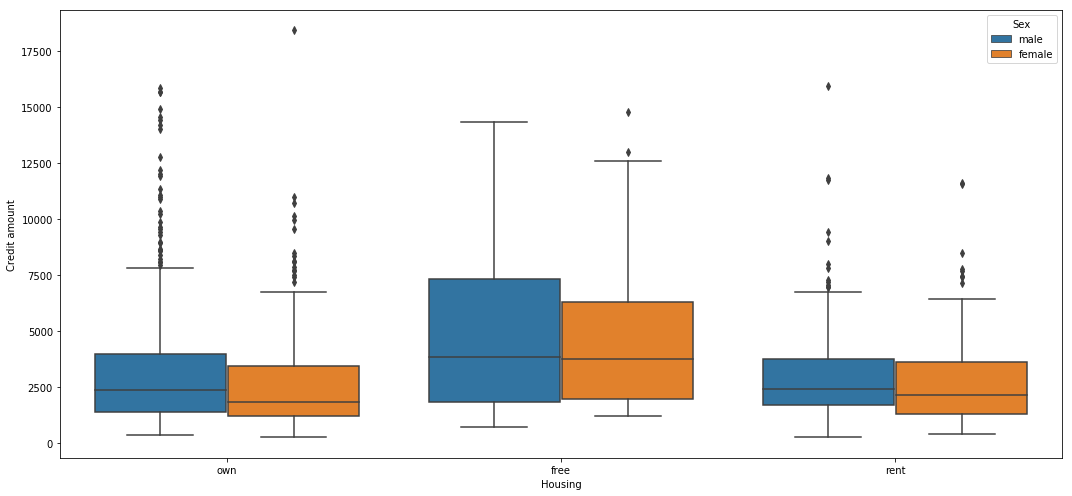

In [23]:
boxes("Housing","Credit amount","Sex",r=0)

In [24]:
data.rename(columns = {'Saving accounts': 'Saving_accounts'}, inplace=True)
data.rename(columns = {'Checking account': 'Checking_account'}, inplace=True)
data.rename(columns = {'Credit amount': 'Credit_amount'}, inplace=True)

In [25]:
data.head(5)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [26]:
print("Sex' : ",data['Sex'].unique())
print("Housing : ",data['Housing'].unique())
print("Saving_accounts : ",data['Saving_accounts'].unique())
print("Checking_account : ",data['Checking_account'].unique())
print("Purpose : ",data['Purpose'].unique())

Sex' :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving_accounts :  ['little' 'quite rich' 'rich' 'moderate']
Checking_account :  ['little' 'moderate' 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [27]:
from sklearn import preprocessing   
le = preprocessing.LabelEncoder()   
 
data['Sex'] = le.fit_transform(data['Sex'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving_accounts'] = le.fit_transform(data['Saving_accounts'])
data['Checking_account'] = le.fit_transform(data['Checking_account'])
data['Purpose'] = le.fit_transform(data['Purpose'])

data.head(5)  

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sex', axis=1), data['Sex'], test_size = 0.25, random_state=45) # Satır; axis=0   Sütun; axis=1


In [30]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))


Test Accuracy of LR Algorithm: 70.40%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test,y_test)
print("Test Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Test Accuracy of Naive Bayes: 70.80%


In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))


Decision Tree Test Accuracy 60.80%


In [33]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 72.40%


In [34]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_score = nn.score(X_test, y_test)
print("MLP Classifier Accuracy Score: {:.2f}%".format(nn_score*100))

MLP Classifier Accuracy Score: 66.40%
